In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, BatchNormalization

In [5]:
# Load the dataset
data = pd.read_pickle('../../preprocessed/tweets_bert.pkl')
data.head()  

,tweet,label,tokens
0,as a woman you shouldnt complain about cleanin...,0,"[101, 2004, 1037, 2450, 2017, 5807, 2102, 1761..."
1,boy dats coldtyga dwn bad for cuffin dat hoe i...,0,"[101, 2879, 23755, 2015, 3147, 3723, 3654, 104..."
2,dawg you ever fuck a bitch and she sta to cry ...,0,"[101, 4830, 27767, 2017, 2412, 6616, 1037, 774..."
3,she look like a tranny,0,"[101, 2016, 2298, 2066, 1037, 25283, 4890, 102]"
4,the shit you hear about me might be true or it...,0,"[101, 1996, 4485, 2017, 2963, 2055, 2033, 2453..."


In [3]:
data

,tweet,label,tokens
0,as a woman you shouldnt complain about cleanin...,0,"[101, 2004, 1037, 2450, 2017, 5807, 2102, 1761..."
1,boy dats coldtyga dwn bad for cuffin dat hoe i...,0,"[101, 2879, 23755, 2015, 3147, 3723, 3654, 104..."
2,dawg you ever fuck a bitch and she sta to cry ...,0,"[101, 4830, 27767, 2017, 2412, 6616, 1037, 774..."
3,she look like a tranny,0,"[101, 2016, 2298, 2066, 1037, 25283, 4890, 102]"
4,the shit you hear about me might be true or it...,0,"[101, 1996, 4485, 2017, 2963, 2055, 2033, 2453..."
...,...,...,...
24778,yous a muthafin lie right his tl is trash now ...,0,"[101, 2017, 2015, 1037, 14163, 8322, 16294, 46..."
24779,youve gone and broke the wrong hea baby and dr...,0,"[101, 2017, 3726, 2908, 1998, 3631, 1996, 3308..."
24780,young buck wanna eat dat nigguh like i aint fu...,0,"[101, 2402, 10131, 10587, 4521, 23755, 9152, 1..."
24781,youu got wild bitches tellin you lies,0,"[101, 2017, 2226, 2288, 3748, 7743, 2229, 2425..."


In [4]:
# Assuming the CSV has columns 'Content' and 'Label'
texts = data['tweet'].tolist()
labels = data['label'].tolist()


# Encode the labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Split data into training, validation, and test sets
train_texts, temp_texts, train_labels, temp_labels = train_test_split(texts, labels, test_size=0.2, random_state=42)
val_texts, test_texts, val_labels, test_labels = train_test_split(temp_texts, temp_labels, test_size=0.5, random_state=42)

In [5]:
# Tokenize the texts
tokenizer = Tokenizer(num_words=10000)  # Use top 10000 words
tokenizer.fit_on_texts(train_texts)
# Convert texts to sequences
train_sequences = tokenizer.texts_to_sequences(train_texts)
val_sequences = tokenizer.texts_to_sequences(val_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

In [81]:


# Pad the sequences
max_length = 500  # Maximum length of the sequences
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post')
val_padded = pad_sequences(val_sequences, maxlen=max_length, padding='post')
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post')


In [82]:
import pickle
# Save the tokenizer
with open('tokenizer_davidson.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [7]:
#Build the BiLSTM model
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_length),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.5),
    Bidirectional(LSTM(64)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Assuming binary classification
])
# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])


d:\AnaConda\envs\project\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [8]:
# Train the model
history = model.fit(
    train_padded, train_labels,
    validation_data=(val_padded, val_labels),
    epochs=5,
    verbose=1
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_padded, test_labels)
print(f'Test Accuracy: {test_accuracy}')

# Save the model


# Print the model summary
model.summary()
#61m 20.7s

Epoch 1/5
620/620 ━━━━━━━━━━━━━━━━━━━━ 636s 1s/step - accuracy: 0.9411 - loss: 0.2343 - val_accuracy: 0.9342 - val_loss: 0.2022
Epoch 2/5
620/620 ━━━━━━━━━━━━━━━━━━━━ 633s 1s/step - accuracy: 0.9530 - loss: 0.1412 - val_accuracy: 0.9366 - val_loss: 0.1812
Epoch 3/5
620/620 ━━━━━━━━━━━━━━━━━━━━ 691s 1s/step - accuracy: 0.9630 - loss: 0.1003 - val_accuracy: 0.9282 - val_loss: 0.2093
Epoch 4/5
620/620 ━━━━━━━━━━━━━━━━━━━━ 662s 1s/step - accuracy: 0.9775 - loss: 0.0634 - val_accuracy: 0.9278 - val_loss: 0.2528
Epoch 5/5
620/620 ━━━━━━━━━━━━━━━━━━━━ 736s 1s/step - accuracy: 0.9831 - loss: 0.0473 - val_accuracy: 0.9298 - val_loss: 0.3455
78/78 ━━━━━━━━━━━━━━━━━━━━ 22s 281ms/step - accuracy: 0.9416 - loss: 0.2600
Test Accuracy: 0.9358612298965454


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 500, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 500, 128)       │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 500, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,457,861 (17.01 MB)

 Trainable params: 1,485,953 (5.67 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,971,908 (11.34 MB)

In [8]:
model.save('BilstmBaseModel_Davidson.h5')

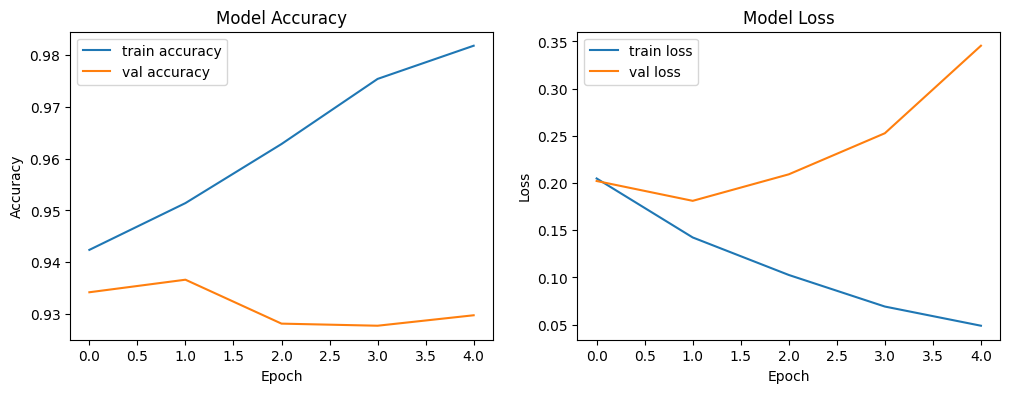

78/78 ━━━━━━━━━━━━━━━━━━━━ 15s 184ms/step
Confusion Matrix:
 [[2289   57]
 [ 102   31]]

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.96      0.98      0.97      2346
     Class 1       0.35      0.23      0.28       133

    accuracy                           0.94      2479
   macro avg       0.65      0.60      0.62      2479
weighted avg       0.92      0.94      0.93      2479



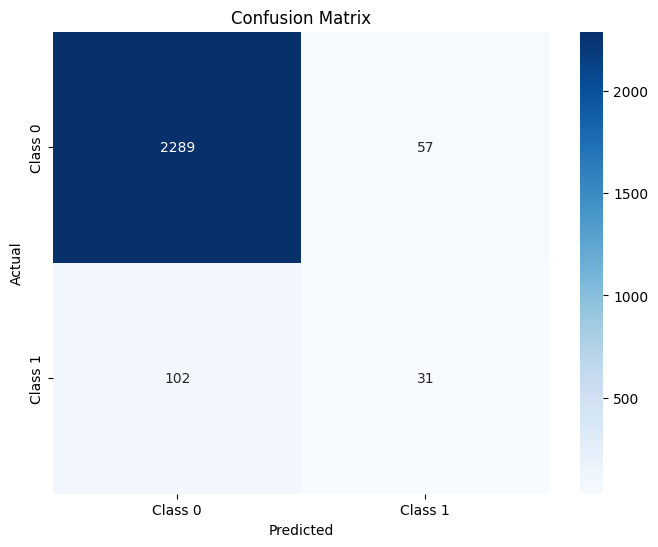

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Plotting training & validation accuracy and loss
def plot_history(history):
    # Plot accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='train accuracy')
    plt.plot(history.history['val_accuracy'], label='val accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='val loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    plt.show()

# Plot the training history
plot_history(history)

# Predicting the labels for the test set
test_predictions = (model.predict(test_padded) > 0.5).astype('int32')

# Confusion matrix and classification report
conf_matrix = confusion_matrix(test_labels, test_predictions)
class_report = classification_report(test_labels, test_predictions, target_names=['Class 0', 'Class 1'])

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Optional: Display the confusion matrix using a heatmap
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


Training vs. Validation Accuracy:

Training accuracy: 98.31% (last epoch)
Validation accuracy: 92.98% (last epoch)
The training accuracy is significantly higher than the validation accuracy, indicating that the model is performing much better on the training data than on the validation data.
Training vs. Validation Loss:

Training loss: 0.0473 (last epoch)
Validation loss: 0.3455 (last epoch)
The validation loss is increasing while the training loss is decreasing, suggesting that the model is not generalizing well to the validation data.



Adding Some layers

In [9]:
from tensorflow.keras.models import load_model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load the saved model
pretrained_model = load_model('BilstmBaseModel_Davidson.h5')


In [10]:
# Rebuild the BiLSTM model with L2 regularization
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_length),
    Bidirectional(LSTM(64, return_sequences=True, kernel_regularizer=l2(0.001))),
    Dropout(0.5),
    Bidirectional(LSTM(64, return_sequences=True, kernel_regularizer=l2(0.001))),
    Dropout(0.5),
    Bidirectional(LSTM(32, kernel_regularizer=l2(0.001))),
    Dropout(0.5),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Assuming binary classification
])
# Build the enhanced BiLSTM model


Additional LSTM Layers:

Added another Bidirectional LSTM layer with 64 units and return_sequences=True.
Added a third Bidirectional LSTM layer with 32 units.
Dense Layers:

Added a Dense layer with 128 units and ReLU activation, followed by a Dropout layer.
Added another Dense layer with 64 units and ReLU activation, followed by a Dropout layer.
Regularization:

Kept L2 regularization on all LSTM and Dense layers to help prevent overfitting.


In [11]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)


In [12]:
# Train the model
history_2 = model.fit(
    train_padded, train_labels,
    validation_data=(val_padded, val_labels),
    epochs=5,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_padded, test_labels)
print(f'Test Accuracy: {test_accuracy}')


# Print the updated model summary
model.summary()
#100m 44.7s

Epoch 1/5
620/620 ━━━━━━━━━━━━━━━━━━━━ 1038s 2s/step - accuracy: 0.9335 - loss: 0.6449 - val_accuracy: 0.9366 - val_loss: 0.2868 - learning_rate: 0.0010
Epoch 2/5
620/620 ━━━━━━━━━━━━━━━━━━━━ 1200s 2s/step - accuracy: 0.9431 - loss: 0.2714 - val_accuracy: 0.9366 - val_loss: 0.2582 - learning_rate: 0.0010
Epoch 3/5
620/620 ━━━━━━━━━━━━━━━━━━━━ 1154s 2s/step - accuracy: 0.9431 - loss: 0.2450 - val_accuracy: 0.9366 - val_loss: 0.2477 - learning_rate: 0.0010
Epoch 4/5
620/620 ━━━━━━━━━━━━━━━━━━━━ 1110s 2s/step - accuracy: 0.9400 - loss: 0.2443 - val_accuracy: 0.9366 - val_loss: 0.2404 - learning_rate: 0.0010
Epoch 5/5
620/620 ━━━━━━━━━━━━━━━━━━━━ 1153s 2s/step - accuracy: 0.9419 - loss: 0.2306 - val_accuracy: 0.9366 - val_loss: 0.2386 - learning_rate: 0.0010
78/78 ━━━━━━━━━━━━━━━━━━━━ 30s 378ms/step - accuracy: 0.9498 - loss: 0.2014
Test Accuracy: 0.9463493227958679


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 500, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 500, 128)       │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 500, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 500, 128)       │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 500, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,606,469 (17.57 MB)

 Trainable params: 1,535,489 (5.86 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,070,980 (11.71 MB)

Callbacks:
EarlyStopping to stop training if the validation loss doesn't improve for 3 epochs.
ReduceLROnPlateau to reduce the learning rate when the validation loss plateaus.

Training and Validation Accuracy:

The training accuracy starts high and remains high, which is good.
The validation accuracy is consistent across epochs, indicating that the model generalizes well.
Training and Validation Loss:

The training loss decreases steadily, which is expected.
The validation loss also decreases and stabilizes, which is a positive sign.
Test Performance:

The test accuracy is high (0.9463), indicating good performance on unseen data.

In [17]:
# Save the updated model
model.save('BilstmBaseModel_Davidson_FT.h5')

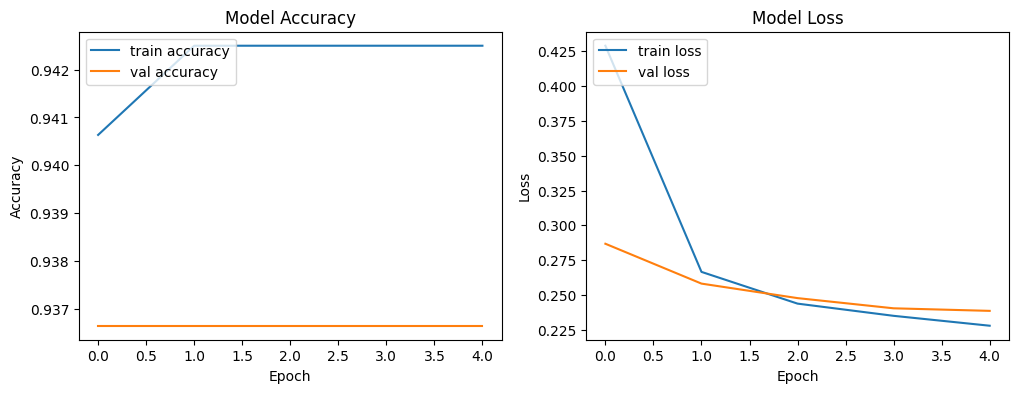

78/78 ━━━━━━━━━━━━━━━━━━━━ 19s 234ms/step
Confusion Matrix:
 [[2346    0]
 [ 133    0]]

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.95      1.00      0.97      2346
     Class 1       0.00      0.00      0.00       133

    accuracy                           0.95      2479
   macro avg       0.47      0.50      0.49      2479
weighted avg       0.90      0.95      0.92      2479



d:\AnaConda\envs\project\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\AnaConda\envs\project\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\AnaConda\envs\project\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


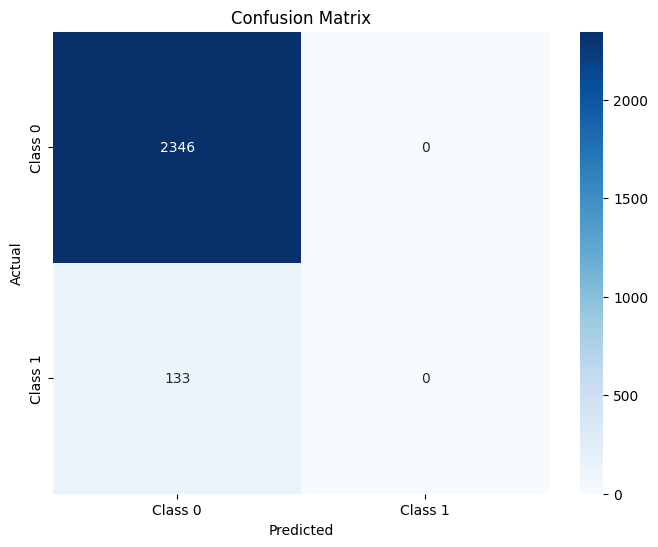

In [15]:
plot_history(history_2)

# Predicting the labels for the test set
test_predictions = (model.predict(test_padded) > 0.5).astype('int32')

# Confusion matrix and classification report
conf_matrix = confusion_matrix(test_labels, test_predictions)
class_report = classification_report(test_labels, test_predictions, target_names=['Class 0', 'Class 1'])

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Optional: Display the confusion matrix using a heatmap
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

Overall, the current model shows strong performance with high accuracy on the test set and no clear signs of overfitting. Depending on your application requirements, you can further fine-tune and test the model to ensure it meets your needs.

In [28]:
from tensorflow.keras.models import load_model
import pickle

# Load the trained model
model = load_model('BilstmBaseModel_Davidson.h5')

# Load the tokenizer
with open('tokenizer_davidson.pkl', 'rb') as handle:
    tokenizer = pickle.load(handle)

# Define a function to preprocess and make predictions on new text data
def predict_hate_speech(text):
    # Tokenize the text
    tokens = tokenizer.texts_to_sequences([text])
    
    # Pad the sequence
    padded_sequence = pad_sequences(tokens, maxlen=500, padding='post')
    
    # Make predictions
    prediction = model.predict(padded_sequence)
    # return prediction
    
    # Apply thresholding
    if prediction[0][0] >= 0.5:
        return "Hate speech detected"
    else:
        return "No hate speech detected"

# Test the function
new_text = "lovely boy"
print(predict_hate_speech(new_text))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 927ms/step
No hate speech detected
